In [1]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
import iris
import numpy as np
import sys
sys.path.append('/pf/b/b381639/Analysis')
import fxtian_function as fx
from iris.time import PartialDateTime
import datetime
import cf_units
import iris.coord_categorisation
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np
import xarray as ar

<ipython-input-36-160d51b78aef>:51: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contourf(lonm,latm,arr[0,:,:],levels=levels1,locator=ticker.LogLocator(),cmap = cbar)


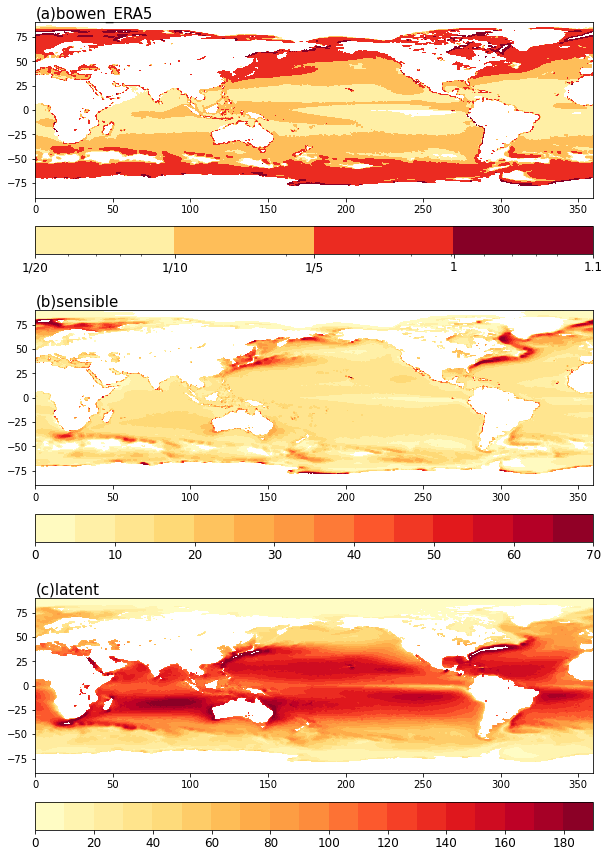

In [36]:
###############
# plot NorEsm
###############
datain = iris.load_cube('/work/bb1153/b381639/ERA5/bowen_year_wm2_ocean_timmean.nc')
regyonx=datain#[:,::4,::4]
#regyonx.data[regyonx.data==0]=np.nan
ERA5_r1=regyonx

datain = iris.load_cube('/work/bb1153/b381639/ERA5/sshf_year_wm2_ocean_timmean.nc')
regyonx=datain#[:,::4,::4]
#regyonx.data[regyonx.data==0]=np.nan
ERA5_r2=regyonx*-1
datain = iris.load_cube('/work/bb1153/b381639/ERA5/slhf_year_wm2_ocean_timmean.nc')
regyonx=datain#[:,::4,::4]
#regyonx.data[regyonx.data==0]=np.nan
ERA5_r3=regyonx*-1
######################
#plot a map lat vs Lon
########################
########
#(1) get x-axis and y axis
arr=ar.DataArray.from_iris(ERA5_r1) # iris cube to xarray
arr2=ar.DataArray.from_iris(ERA5_r2)
arr3=ar.DataArray.from_iris(ERA5_r3)
latm=arr.latitude.data              # latm is x-axis
lonm=arr.longitude.data             # lonm is y-axis  



##################
#(2)set color bar and prepare fig size
#levels1=np.arange(-10.,10.,1.) # min and max of the field; dont use it if not sure

#cbar='ocean'
#cbar='bwr'
#cbar='reds'
#cbar='seismic'

plt.figure(figsize=(10,15))


plt.subplot(311)
cbar='YlOrRd'
#levels1=np.linspace(-.1,2.,22)
#levels1=np.arange(-0.,2,0.1)
from matplotlib import ticker, cm
from matplotlib.ticker import LogFormatter 

levels1=[0.05,0.1,0.2,1,1.1]
plt.gca().set_title('(a)bowen_ERA5',y=1.1, pad=-14,loc='left',fontsize=15)
plt.contourf(lonm,latm,arr[0,:,:],levels=levels1,locator=ticker.LogLocator(),cmap = cbar)
formatter = LogFormatter(10, labelOnlyBase=False) 
cbar=plt.colorbar(format=formatter,orientation='horizontal', pad=0.12)
cbar.ax.set_xticklabels(['1/20','1/10','1/5','1','1.1'])  # horizontal colorbar
cbar.ax.tick_params(labelsize = 12) 

plt.subplot(312)
cbar='YlOrRd'
#levels1=np.linspace(0,75,17)
levels1=np.arange(0,75,5)
plt.gca().set_title('(b)sensible',y=1.1, pad=-14,loc='left',fontsize=15)
plt.contourf(lonm,latm,arr2[0,:,:],levels=levels1,cmap = cbar)
#plt.contourf(lonm,latm,arr2[0,:,:],cmap = cbar)
cbar=plt.colorbar(orientation='horizontal', pad=0.12)
cbar.ax.tick_params(labelsize = 12) 



plt.subplot(313)
cbar='YlOrRd'
#levels1=np.linspace(0,180,11)
levels1=np.arange(0,200,10)
plt.gca().set_title('(c)latent',y=1.1, pad=-14,loc='left',fontsize=15)
plt.contourf(lonm,latm,arr3[0,:,:],levels=levels1,cmap = cbar)
cbar=plt.colorbar(orientation='horizontal', pad=0.12)
cbar.ax.tick_params(labelsize = 12)        
#plt.suptitle('bowen ratio NorEsm',fontsize=20,y=0.9)




#####save figure
plt.savefig('bowen_ratio_Global_ERA5.eps',format='eps',dpi=1000)




<ipython-input-40-969852de6efa>:58: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contourf(lonmx,latm,arr[0,:,:],levels=levels1,locator=ticker.LogLocator(),cmap = cbar)


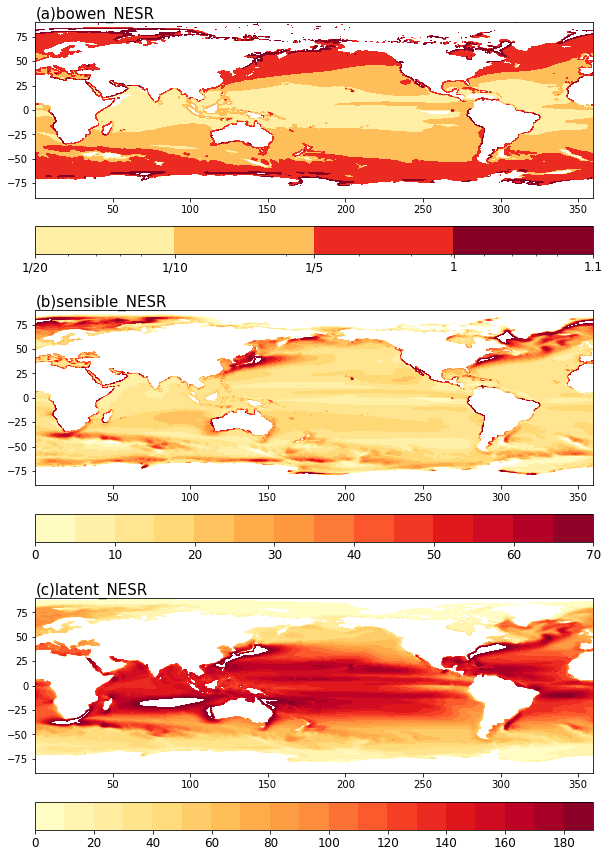

In [40]:
###############
# plot NorEsm
###############
datain = iris.load_cube('/work/bb1153/b381639/model/NorEsm_data/bowen_126-150_timmean_ocean.nc')
regyonx=datain#[:,::4,::4]
#regyonx.data[regyonx.data==0]=np.nan
ERA5_r1=regyonx

datain = iris.load_cube('/work/bb1153/b381639/model/NorEsm_data/SHFLX_126-150_timmean_ocean.nc')
regyonx=datain#[:,::4,::4]
#regyonx.data[regyonx.data==0]=np.nan
ERA5_r2=regyonx

datain = iris.load_cube('/work/bb1153/b381639/model/NorEsm_data/LHFLX_126-150_timmean_ocean.nc')
regyonx=datain#[:,::4,::4]
#regyonx.data[regyonx.data==0]=np.nan
ERA5_r3=regyonx

######################
#plot a map lat vs Lon
########################
########
#(1) get x-axis and y axis
arr=ar.DataArray.from_iris(ERA5_r1) # iris cube to xarray
arr2=ar.DataArray.from_iris(ERA5_r2)
arr3=ar.DataArray.from_iris(ERA5_r3)
latm=arr.latitude.data              # latm is x-axis
lonm=arr.longitude.data             # lonm is y-axis  

arr = np.roll(arr, 360, axis = 2)
arr2 = np.roll(arr2, 360, axis = 2)
arr3 = np.roll(arr3, 360, axis = 2)

lonmx= lonm +180.

#print(lonmx)
##################
#(2)set color bar and prepare fig size
#levels1=np.arange(-10.,10.,1.) # min and max of the field; dont use it if not sure

#cbar='ocean'
#cbar='bwr'
#cbar='reds'
#cbar='seismic'

plt.figure(figsize=(10,15))


plt.subplot(311)
cbar='YlOrRd'
#levels1=np.linspace(-.1,2.,22)
#levels1=np.arange(-0.,2,0.1)
from matplotlib import ticker, cm
from matplotlib.ticker import LogFormatter 

levels1=[0.05,0.1,0.2,1,1.1]
plt.gca().set_title('(a)bowen_NESR',y=1.1, pad=-14,loc='left',fontsize=15)
plt.contourf(lonmx,latm,arr[0,:,:],levels=levels1,locator=ticker.LogLocator(),cmap = cbar)
formatter = LogFormatter(10, labelOnlyBase=False) 
cbar=plt.colorbar(format=formatter,orientation='horizontal', pad=0.12)
cbar.ax.set_xticklabels(['1/20','1/10','1/5','1','1.1'])  # horizontal colorbar
cbar.ax.tick_params(labelsize = 12) 

plt.subplot(312)
cbar='YlOrRd'
#levels1=np.linspace(0,75,17)
levels1=np.arange(0,75,5)
plt.gca().set_title('(b)sensible_NESR',y=1.1, pad=-14,loc='left',fontsize=15)
plt.contourf(lonmx,latm,arr2[0,:,:],levels=levels1,cmap = cbar)
#plt.contourf(lonm,latm,arr2[0,:,:],cmap = cbar)
cbar=plt.colorbar(orientation='horizontal', pad=0.12)
cbar.ax.tick_params(labelsize = 12) 



plt.subplot(313)
cbar='YlOrRd'
#levels1=np.linspace(0,180,11)
levels1=np.arange(0,200,10)
plt.gca().set_title('(c)latent_NESR',y=1.1, pad=-14,loc='left',fontsize=15)
plt.contourf(lonmx,latm,arr3[0,:,:],levels=levels1,cmap = cbar)
cbar=plt.colorbar(orientation='horizontal', pad=0.12)
cbar.ax.tick_params(labelsize = 12)        
#plt.suptitle('bowen ratio NorEsm',fontsize=20,y=0.9)




#####save figure
plt.savefig('bowen_ratio_Global_Noresm_SR.eps',format='eps',dpi=1000)




/sw/spack-rhel6/miniforge3-4.9.2-3-Linux-x86_64-pwdbqi/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'bowen'
  warnings.warn(message % (variable_name, nc_var_name))
/sw/spack-rhel6/miniforge3-4.9.2-3-Linux-x86_64-pwdbqi/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'hfss'
  warnings.warn(message % (variable_name, nc_var_name))
/sw/spack-rhel6/miniforge3-4.9.2-3-Linux-x86_64-pwdbqi/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'hfls'
  warnings.warn(message % (variable_name, nc_var_name))
<ipython-input-39-6fdb22ea6045>:52: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contourf(lonm,latm,arr[0,:,:],levels=levels1,locator=ticker.LogLocator(),cmap = cbar)


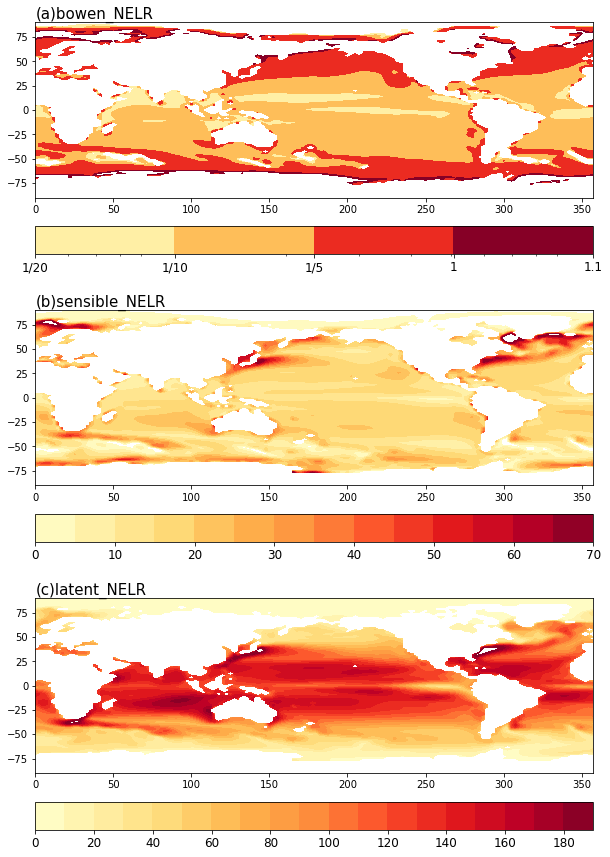

In [39]:
###############
# plot NorEsm
###############
datain = iris.load_cube('/work/bb1153/b381639/model/NorEsm_data/Bowen_day_NorESM2-LM_historical_r1i1p1f1_glomltm_1850-2009.nc')
regyonx=datain#[:,::4,::4]
#regyonx.data[regyonx.data==0]=np.nan
ERA5_r1=regyonx

datain = iris.load_cube('/work/bb1153/b381639/model/NorEsm_data/hfss_day_NorESM2-LM_historical_r1i1p1f1_glomltm_1850-2009.nc')
regyonx=datain#[:,::4,::4]
#regyonx.data[regyonx.data==0]=np.nan
ERA5_r2=regyonx
datain = iris.load_cube('/work/bb1153/b381639/model/NorEsm_data/hfls_day_NorESM2-LM_historical_r1i1p1f1_glomltm_1850-2009.nc')
regyonx=datain#[:,::4,::4]
#regyonx.data[regyonx.data==0]=np.nan
ERA5_r3=regyonx

######################
#plot a map lat vs Lon
########################
########
#(1) get x-axis and y axis
arr=ar.DataArray.from_iris(ERA5_r1) # iris cube to xarray
arr2=ar.DataArray.from_iris(ERA5_r2)
arr3=ar.DataArray.from_iris(ERA5_r3)
latm=arr.lat.data              # latm is x-axis
lonm=arr.lon.data             # lonm is y-axis  



##################
#(2)set color bar and prepare fig size
#levels1=np.arange(-10.,10.,1.) # min and max of the field; dont use it if not sure

#cbar='ocean'
#cbar='bwr'
#cbar='reds'
#cbar='seismic'

plt.figure(figsize=(10,15))


plt.subplot(311)
cbar='YlOrRd'
#levels1=np.linspace(-.1,2.,22)
#levels1=np.arange(-0.,2,0.1)
from matplotlib import ticker, cm
from matplotlib.ticker import LogFormatter 

levels1=[0.05,0.1,0.2,1,1.1]
plt.gca().set_title('(a)bowen_NELR',y=1.1, pad=-14,loc='left',fontsize=15)
plt.contourf(lonm,latm,arr[0,:,:],levels=levels1,locator=ticker.LogLocator(),cmap = cbar)
formatter = LogFormatter(10, labelOnlyBase=False) 
cbar=plt.colorbar(format=formatter,orientation='horizontal', pad=0.12)
cbar.ax.set_xticklabels(['1/20','1/10','1/5','1','1.1'])  # horizontal colorbar
cbar.ax.tick_params(labelsize = 12) 

plt.subplot(312)
cbar='YlOrRd'
#levels1=np.linspace(0,75,17)
levels1=np.arange(0,75,5)
plt.gca().set_title('(b)sensible_NELR',y=1.1, pad=-14,loc='left',fontsize=15)
plt.contourf(lonm,latm,arr2[0,:,:],levels=levels1,cmap = cbar)
cbar=plt.colorbar(orientation='horizontal', pad=0.12)
cbar.ax.tick_params(labelsize = 12) 



plt.subplot(313)
cbar='YlOrRd'
#levels1=np.linspace(0,180,11)
levels1=np.arange(0,200,10)
plt.gca().set_title('(c)latent_NELR',y=1.1, pad=-14,loc='left',fontsize=15)
plt.contourf(lonm,latm,arr3[0,:,:],levels=levels1,cmap = cbar)
cbar=plt.colorbar(orientation='horizontal', pad=0.12)
cbar.ax.tick_params(labelsize = 12)        
#plt.suptitle('bowen ratio NorEsm',fontsize=20,y=0.9)




#####save figure
plt.savefig('bowen_ratio_Global_Noresm.eps',format='eps',dpi=1000)




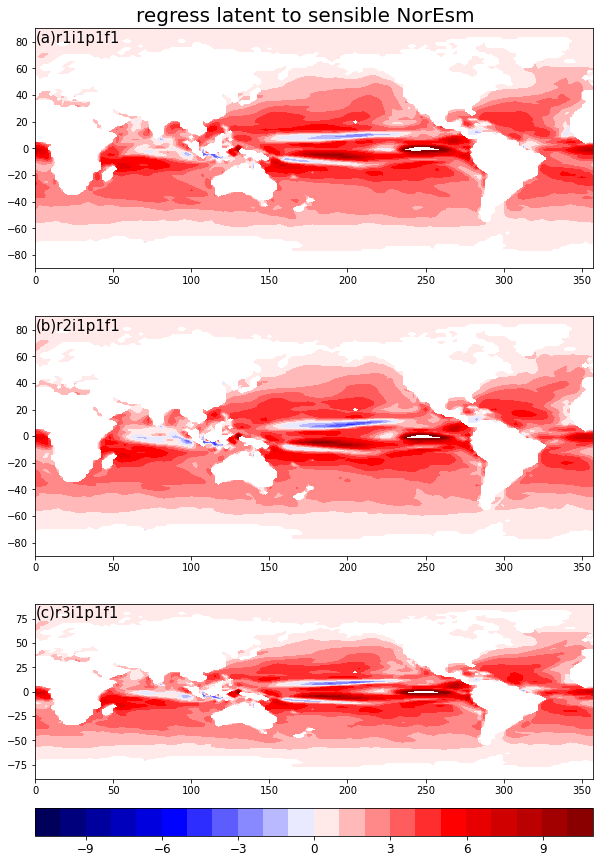

In [48]:
###############
# plot NorEsm
###############
datain = iris.load_cube('/work/bb1153/b381639/model/NorEsm_data/regress_slhf_sshf_NorEsm_1850-2014_yearly_r1glb.nc')
regyonx=datain#[:,::4,::4]
#regyonx.data[regyonx.data==0]=np.nan
ERA5_r1=regyonx

datain = iris.load_cube('/work/bb1153/b381639/model/NorEsm_data/regress_slhf_sshf_NorEsm_1850-2014_yearly_r2glb.nc')
regyonx=datain#[:,::4,::4]
#regyonx.data[regyonx.data==0]=np.nan
ERA5_r2=regyonx
datain = iris.load_cube('/work/bb1153/b381639/model/NorEsm_data/regress_slhf_sshf_NorEsm_1850-2014_yearly_r3glb.nc')
regyonx=datain#[:,::4,::4]
#regyonx.data[regyonx.data==0]=np.nan
ERA5_r3=regyonx

######################
#plot a map lat vs Lon
########################
########
#(1) get x-axis and y axis
arr=ar.DataArray.from_iris(ERA5_r1) # iris cube to xarray
arr2=ar.DataArray.from_iris(ERA5_r2)
arr3=ar.DataArray.from_iris(ERA5_r3)
latm=arr.lat.data              # latm is x-axis
lonm=arr.lon.data             # lonm is y-axis  



##################
#(2)set color bar and prepare fig size
#levels1=np.arange(-10.,10.,1.) # min and max of the field; dont use it if not sure
levels1=np.linspace(-11.,11.,23)
#cbar='ocean'
#cbar='bwr'
#cbar='jet'
cbar='seismic'

plt.figure(figsize=(10,15))


plt.subplot(311)
plt.gca().set_title('(a)r1i1p1f1',y=1.0, pad=-14,loc='left',fontsize=15)

plt.contourf(lonm,latm,arr[0,:,:],levels=levels1,cmap = cbar)


plt.subplot(312)
plt.gca().set_title('(b)r2i1p1f1',y=1.0, pad=-14,loc='left',fontsize=15)
plt.contourf(lonm,latm,arr2[0,:,:],levels=levels1,cmap = cbar)

plt.subplot(313)
plt.gca().set_title('(c)r3i1p1f1',y=1.0, pad=-14,loc='left',fontsize=15)
plt.contourf(lonm,latm,arr3[0,:,:],levels=levels1,cmap = cbar)

#
cbar=plt.colorbar(orientation='horizontal', pad=0.12)
cbar.ax.tick_params(labelsize = 12)        
#plt.xlabel(('longitude'), fontsize=18)
#plt.ylabel(('latitude'), fontsize=18)
#plt.xticks(fontsize=25)#, rotation=90)
#plt.yticks(fontsize=25)#, rotation=90)
plt.suptitle('regress latent to sensible NorEsm',fontsize=20,y=0.9)




#####save figure
plt.savefig('regress_latent2sensible_NorEsm_r1Global.eps',format='eps',dpi=1000)




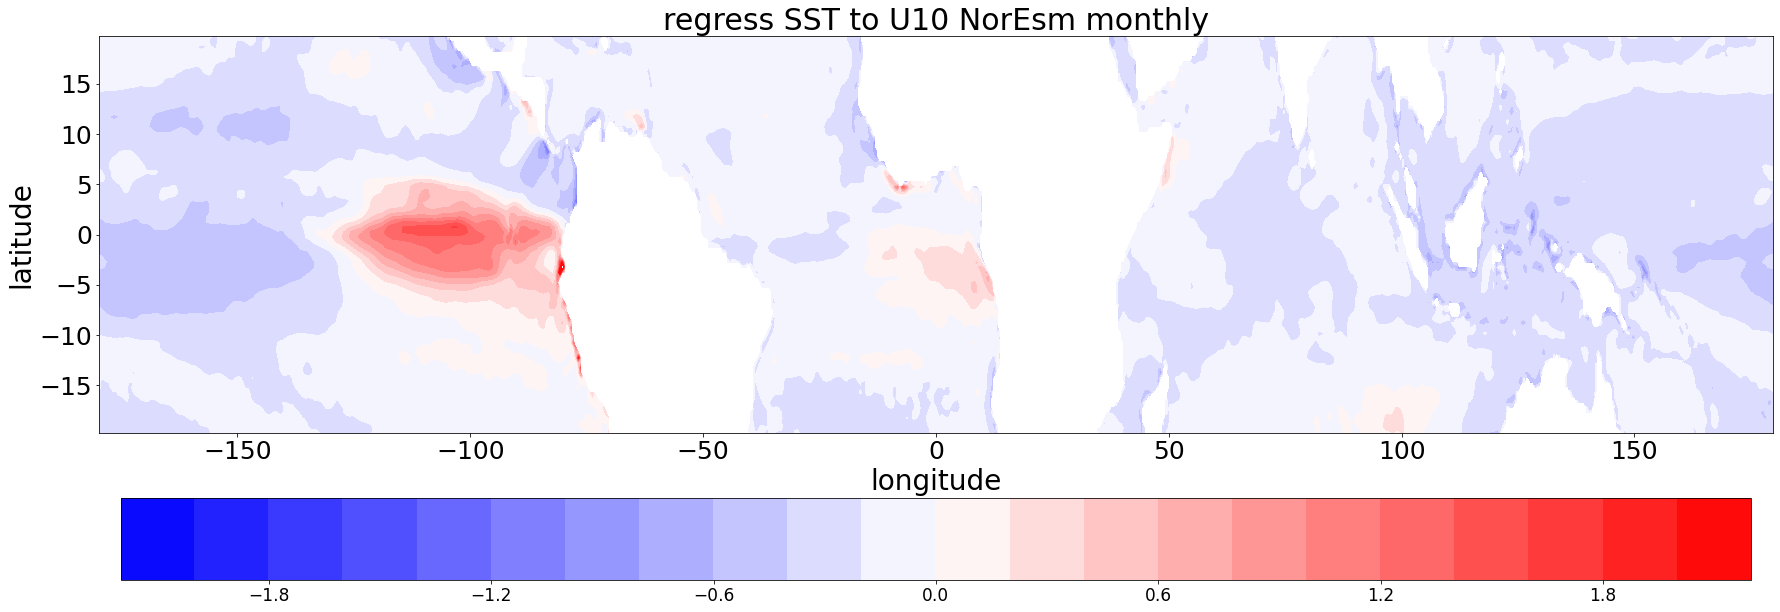

In [22]:
###############
# plot NorEsm
###############
datain = iris.load_cube('/work/bb1153/b381639/model/NorEsm_data/regress_SST_U10_NorEsm_monthly.nc')
#datain.data=datain.data*-1
regyonx=datain#[:,::4,::4]
regyonx.data[regyonx.data==0]=np.nan
ERA5=regyonx
######################
#plot a map lat vs Lon
########################
########
#(1) get x-axis and y axis
arr=ar.DataArray.from_iris(ERA5) # iris cube to xarray
latm=arr.latitude.data              # latm is x-axis
lonm=arr.longitude.data             # lonm is y-axis  

##################
#(2)set color bar and prepare fig size
#levels1=np.arange(-10.,10.,1.) # min and max of the field; dont use it if not sure
levels1=np.linspace(-2.2,2.2,23)
#cbar='ocean'
cbar='bwr'
#cbar='jet'

plt.figure(figsize=(30,10))
#plot the figure
plt.contourf(lonm,latm,arr[0,:,:],levels=levels1,cmap = cbar)
#plt.contourf(lonm,latm,arr[0,:,:],cmap = cbar)
#plt.title('SST- ICON 5N-5S daily from 20/1/2020')

plt.title('regress SST to U10 NorEsm monthly',fontsize=30)
cbar=plt.colorbar(orientation='horizontal', pad=0.12)
cbar.ax.tick_params(labelsize = 17)
        
plt.xlabel(('longitude'), fontsize=28)
plt.ylabel(('latitude'), fontsize=28)
plt.xticks(fontsize=25)#, rotation=90)
plt.yticks(fontsize=25)#, rotation=90)


#####save figure
plt.savefig('regress_SST_U10_NorEsm_montly.eps',format='eps',dpi=1000)


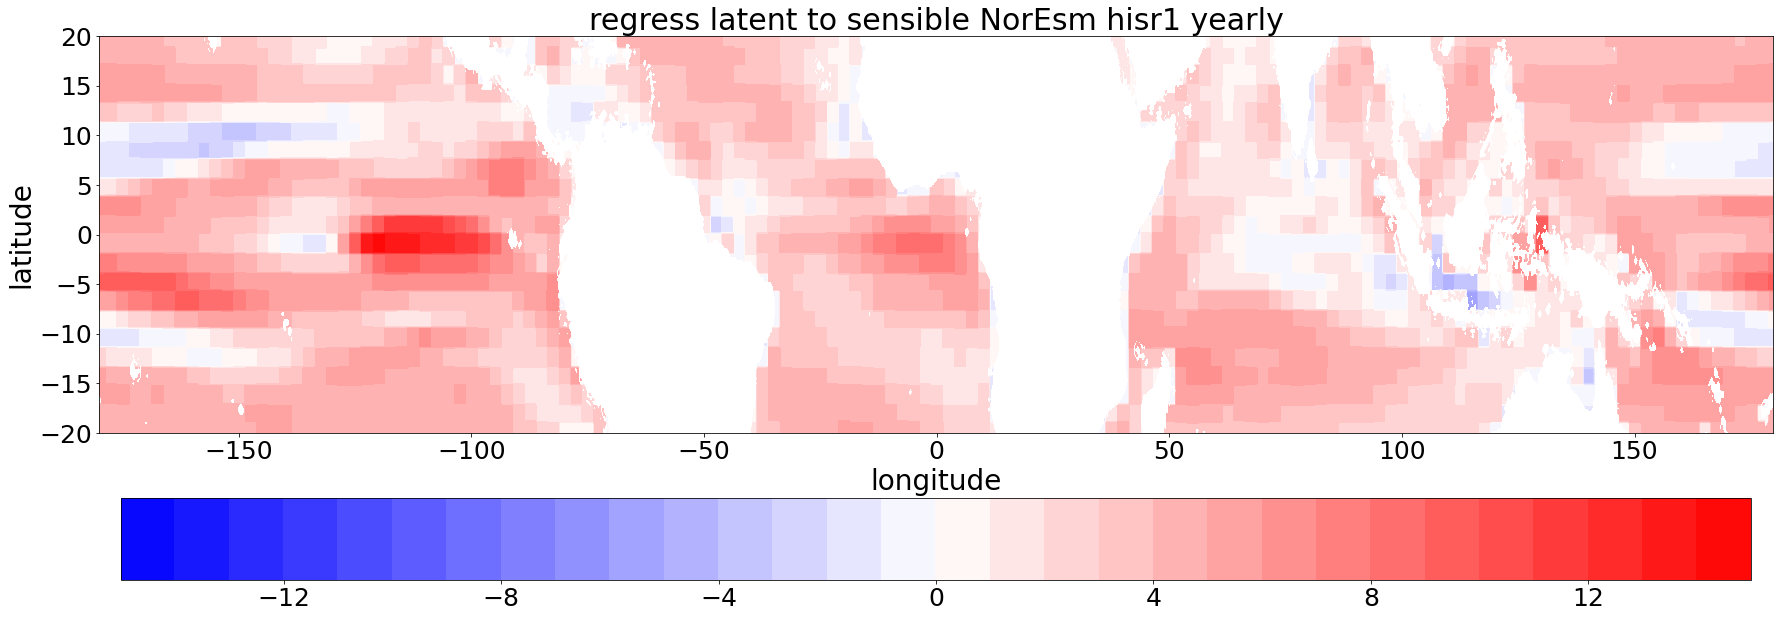

In [9]:
###############
# plot NorEsm
###############
#datain = iris.load_cube('/work/bb1153/b381639/model/NorEsm_data/regress_slhf_sshf_NorEsm_1850-2014_yearly.nc')
datain = iris.load_cube('/work/bb1153/b381639/model/NorEsm_data/regress_slhf_sshf_NorEsm_1850-2014_yearly_r1.nc')

#datain.data=datain.data*-1
regyonx=datain#[:,::4,::4]
#regyonx.data[regyonx.data==0]=np.nan
ERA5=regyonx
######################
#plot a map lat vs Lon
########################
########
#(1) get x-axis and y axis
arr=ar.DataArray.from_iris(ERA5) # iris cube to xarray
latm=arr.latitude.data              # latm is x-axis
lonm=arr.longitude.data             # lonm is y-axis  

##################
#(2)set color bar and prepare fig size
#levels1=np.arange(-10.,10.,1.) # min and max of the field; dont use it if not sure
levels1=np.linspace(-15.,15.,31)
#cbar='ocean'
cbar='bwr'
#cbar='jet'

plt.figure(figsize=(30,10))
#plot the figure
plt.contourf(lonm,latm,arr[0,:,:],levels=levels1,cmap = cbar)
#plt.contourf(lonm,latm,arr[0,:,:],cmap = cbar)
#plt.title('SST- ICON 5N-5S daily from 20/1/2020')

plt.title('regress latent to sensible NorEsm hisr1 yearly',fontsize=30)
cbar=plt.colorbar(orientation='horizontal', pad=0.12)
cbar.ax.tick_params(labelsize = 25)
        
plt.xlabel(('longitude'), fontsize=28)
plt.ylabel(('latitude'), fontsize=28)
plt.xticks(fontsize=25)#, rotation=90)
plt.yticks(fontsize=25)#, rotation=90)


#####save figure
plt.savefig('regress_latent2sensible_NorEsm_hisr1_yearly.eps',format='eps',dpi=1000)

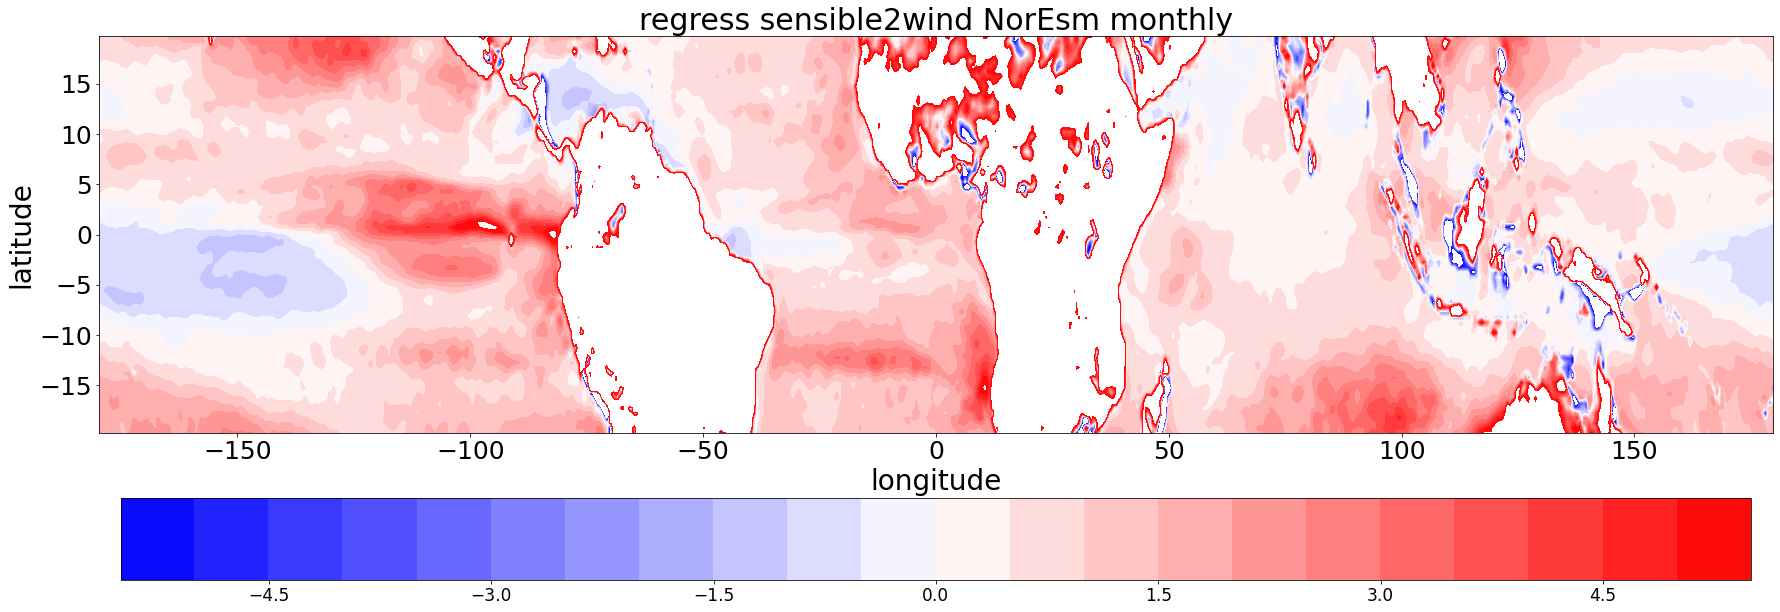

In [10]:
###############
# plot NorEsm
###############
datain = iris.load_cube('/work/bb1153/b381639/model/NorEsm_data/regress_SHFLX_U10_NorEsm_monthly.nc')
#datain.data=datain.data*-1
regyonx=datain#[:,::4,::4]
#regyonx.data[regyonx.data==0]=np.nan
ERA5=regyonx
######################
#plot a map lat vs Lon
########################
########
#(1) get x-axis and y axis
arr=ar.DataArray.from_iris(ERA5) # iris cube to xarray
latm=arr.latitude.data              # latm is x-axis
lonm=arr.longitude.data             # lonm is y-axis  

##################
#(2)set color bar and prepare fig size
#levels1=np.arange(-10.,10.,1.) # min and max of the field; dont use it if not sure
levels1=np.linspace(-5.5,5.5,23)
#cbar='ocean'
cbar='bwr'
#cbar='jet'

plt.figure(figsize=(30,10))
#plot the figure
plt.contourf(lonm,latm,arr[0,:,:],levels=levels1,cmap = cbar)
#plt.contourf(lonm,latm,arr[0,:,:],cmap = cbar)
#plt.title('SST- ICON 5N-5S daily from 20/1/2020')

plt.title('regress sensible2wind NorEsm monthly',fontsize=30)
cbar=plt.colorbar(orientation='horizontal', pad=0.12)
cbar.ax.tick_params(labelsize = 17)
        
plt.xlabel(('longitude'), fontsize=28)
plt.ylabel(('latitude'), fontsize=28)
plt.xticks(fontsize=25)#, rotation=90)
plt.yticks(fontsize=25)#, rotation=90)


#####save figure
plt.savefig('regress_SHFLX_U10_NorEsm_montly.eps',format='eps',dpi=1000)


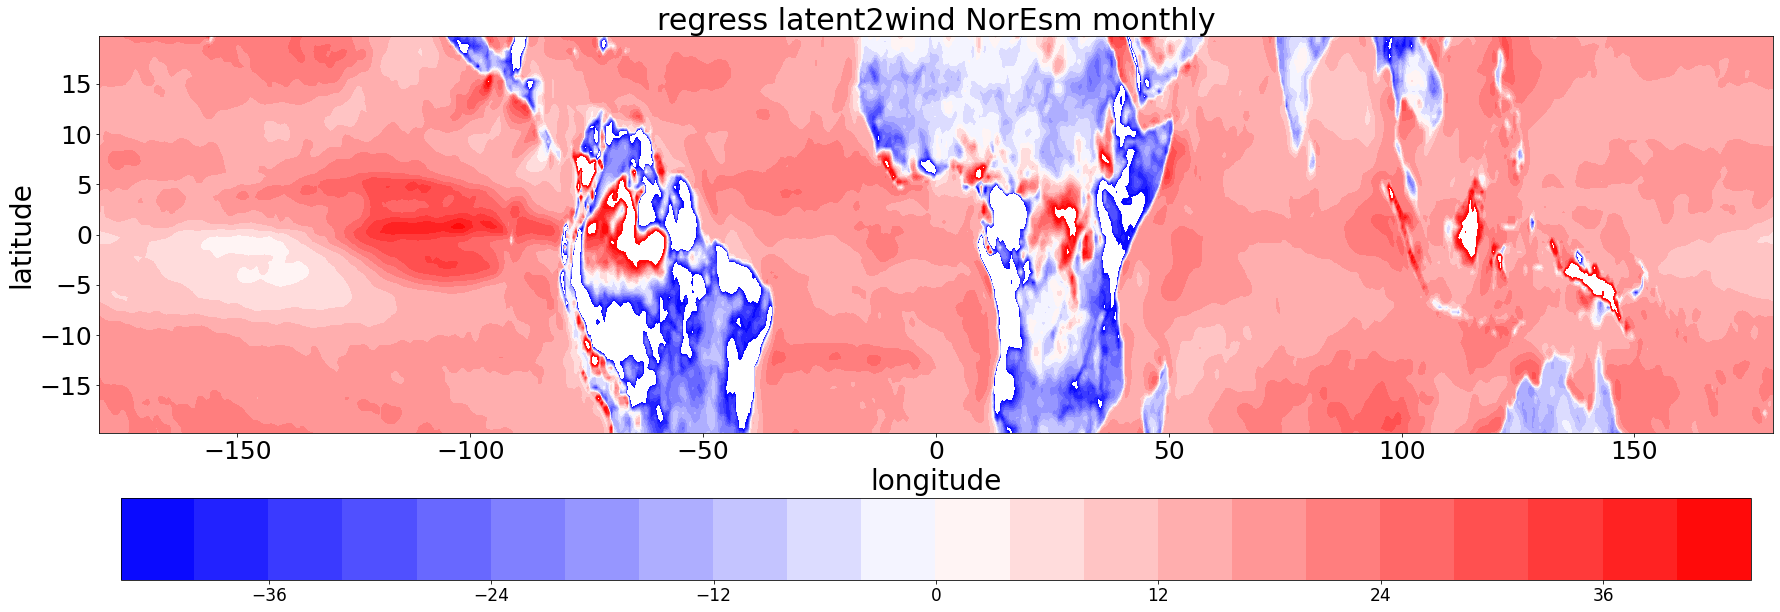

In [21]:
###############
# plot NorEsm
###############
datain = iris.load_cube('/work/bb1153/b381639/model/NorEsm_data/regress_LHFLX_U10_NorEsm_monthly.nc')
#datain.data=datain.data*-1
regyonx=datain#[:,::4,::4]
#regyonx.data[regyonx.data==0]=np.nan
ERA5=regyonx
######################
#plot a map lat vs Lon
########################
########
#(1) get x-axis and y axis
arr=ar.DataArray.from_iris(ERA5) # iris cube to xarray
latm=arr.latitude.data              # latm is x-axis
lonm=arr.longitude.data             # lonm is y-axis  

##################
#(2)set color bar and prepare fig size
#levels1=np.arange(-10.,10.,1.) # min and max of the field; dont use it if not sure
levels1=np.linspace(-44.,44.,23)
#cbar='ocean'
cbar='bwr'
#cbar='jet'

plt.figure(figsize=(30,10))
#plot the figure
plt.contourf(lonm,latm,arr[0,:,:],levels=levels1,cmap = cbar)
#plt.contourf(lonm,latm,arr[0,:,:],cmap = cbar)
#plt.title('SST- ICON 5N-5S daily from 20/1/2020')

plt.title('regress latent2wind NorEsm monthly',fontsize=30)
cbar=plt.colorbar(orientation='horizontal', pad=0.12)
cbar.ax.tick_params(labelsize = 17)
        
plt.xlabel(('longitude'), fontsize=28)
plt.ylabel(('latitude'), fontsize=28)
plt.xticks(fontsize=25)#, rotation=90)
plt.yticks(fontsize=25)#, rotation=90)


#####save figure
plt.savefig('regress_LHFLX_U10_NorEsm_montly.eps',format='eps',dpi=1000)

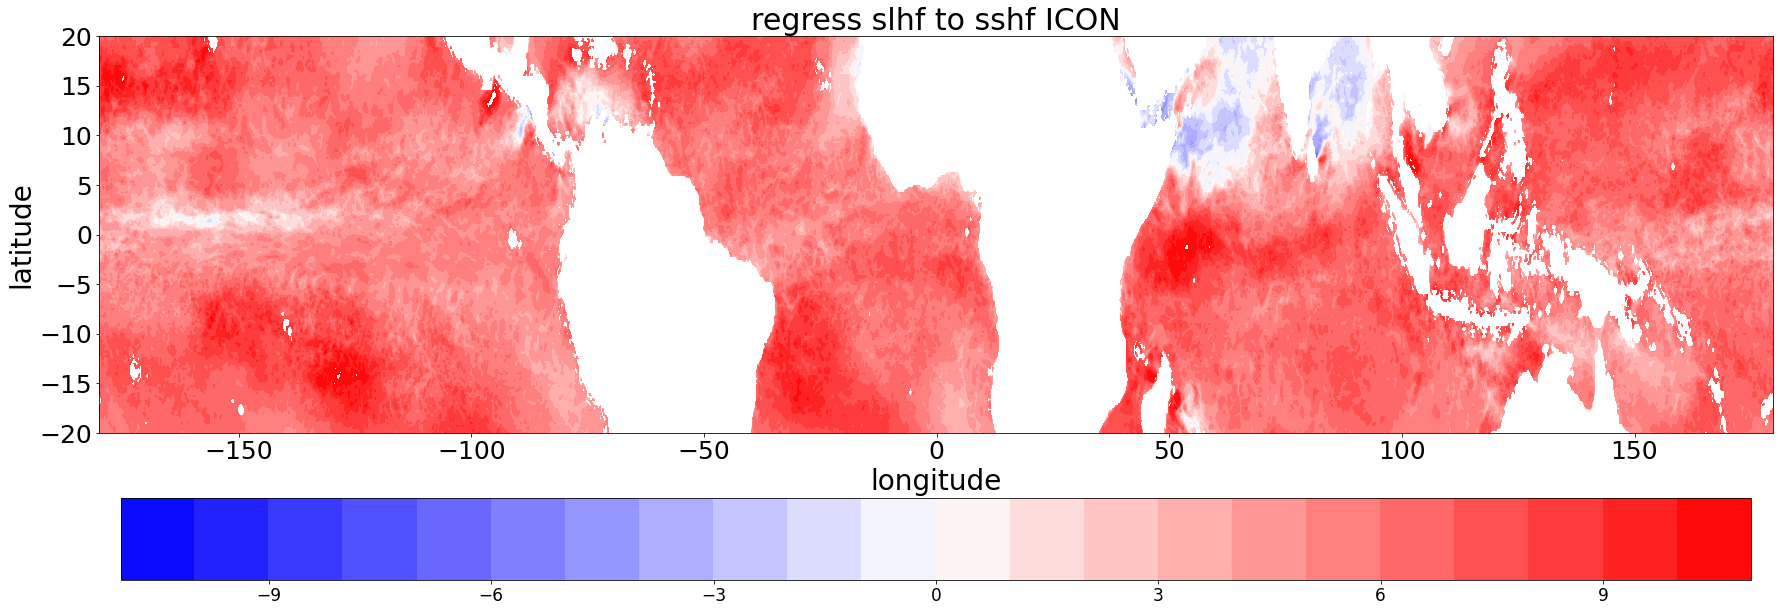

In [3]:
###############
# plot ERA5
###############
datain = iris.load_cube('/work/bb1153/b381639/model/data_icon/regress_slhf_sshf_daily.nc')
#datain.data=datain.data*-1
regyonx=datain#[:,::4,::4]
ICON=regyonx

######################
#plot a map lat vs Lon
########################
########
#(1) get x-axis and y axis
arr=ar.DataArray.from_iris(ICON) # iris cube to xarray
latm=arr.latitude.data              # latm is x-axis
lonm=arr.longitude.data 
##################
#(2)set color bar and prepare fig size
#levels1=np.arange(-10.,10.,1.) # min and max of the field; dont use it if not sure
levels1=np.linspace(-11.,11.,23)
#cbar='ocean'
cbar='bwr'
#cbar='jet'

plt.figure(figsize=(30,10))
#plot the figure
plt.contourf(lonm,latm,arr[0,:,:],levels=levels1,cmap = cbar)
plt.title('regress slhf to sshf ICON daily',fontsize=30)
cbar=plt.colorbar(orientation='horizontal', pad=0.12)
cbar.ax.tick_params(labelsize = 17)
        
plt.xlabel(('longitude'), fontsize=28)
plt.ylabel(('latitude'), fontsize=28)
plt.xticks(fontsize=25)#, rotation=90)
plt.yticks(fontsize=25)#, rotation=90)

#####save figure
plt.savefig('regress_slhf_sshf_ICON_daily.png',dpi=200)

In [40]:
diff = ICON-ERA5

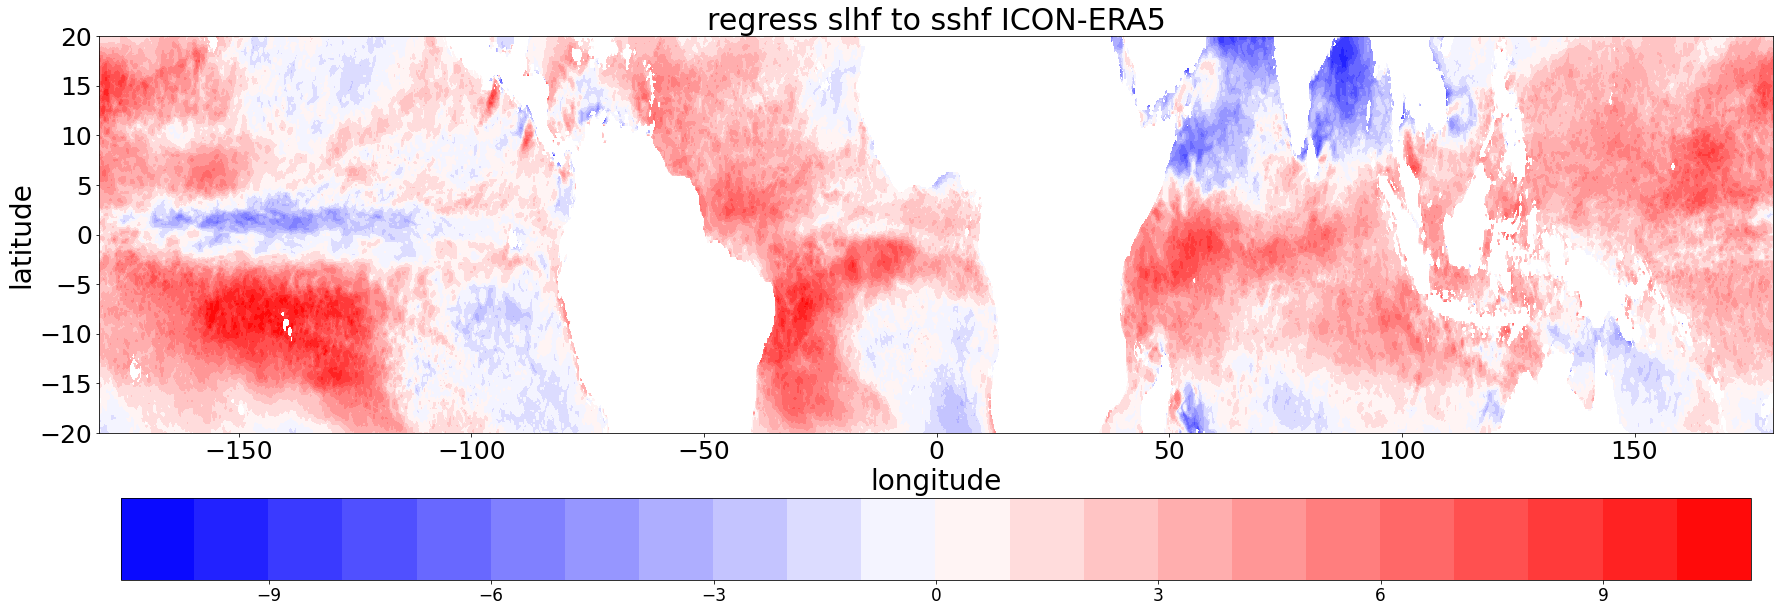

In [41]:
######################
#plot a map lat vs Lon
########################
########
#(1) get x-axis and y axis
arr=ar.DataArray.from_iris(diff) # iris cube to xarray
latm=arr.latitude.data              # latm is x-axis
lonm=arr.longitude.data 
##################
#(2)set color bar and prepare fig size
#levels1=np.arange(-10.,10.,1.) # min and max of the field; dont use it if not sure
levels1=np.linspace(-11.,11.,23)
#cbar='ocean'
cbar='bwr'
#cbar='jet'

plt.figure(figsize=(30,10))
#plot the figure
plt.contourf(lonm,latm,arr[0,:,:],levels=levels1,cmap = cbar)
plt.title('regress slhf to sshf ICON-ERA5',fontsize=30)
cbar=plt.colorbar(orientation='horizontal', pad=0.12)
cbar.ax.tick_params(labelsize = 17)
        
plt.xlabel(('longitude'), fontsize=28)
plt.ylabel(('latitude'), fontsize=28)
plt.xticks(fontsize=25)#, rotation=90)
plt.yticks(fontsize=25)#, rotation=90)

#####save figure
plt.savefig('regress_slhf_sshf_ICON-ERA5.png',dpi=200)